In [1]:
import numpy as np

class PCA:
    pass

    def __init__(self,n_components = 0.95):
        pass
        self.n_components = n_components

    def centralization(self,X):
        pass
        """中心化
            每个数据减去该列的均值,除以该列的标准差
        """
        self._mean = np.mean(X,axis=0)
        self._std = np.std(X,axis=0)
        return (X - self._mean)/self._std

    def _calc_explained_variance_ratio(self,s):
        #求方差解释率
        explained_variance = s ** 2
        total_var = explained_variance.sum()
        #方差解释率
        explained_variance_ratio_ = explained_variance / total_var
        #按行累加
        ratio_cumsum = np.cumsum(explained_variance_ratio_)
        #找到n_components在数组中的下标位置
        k = np.searchsorted(ratio_cumsum, self.n_components,
                                           side='right')+1
        return k

    def fit_transform(self,X):
        #首先进行中心化
        X_cent = self.centralization(X)
        #奇异值分解
        _,self.s,self.v = np.linalg.svd(X_cent,full_matrices=False)

        #选择保留多少维度
        if self.n_components < 1:
            self._k = self._calc_explained_variance_ratio(self.s)
        else:
            self._k = self.n_components

        #投影数据
        X_project = np.dot(X_cent,self.v.T[:,0:self._k])
        return X_project


    def inverse_transform(self,X_project):
        pass
        """恢复数据"""
        v_rec = self.v[0:self._k]
        X_rec = np.dot(X_project,v_rec)
        return X_rec*self._std +self._mean



(87, 198, 3)
(87, 198)
(87, 13)
(87, 198)


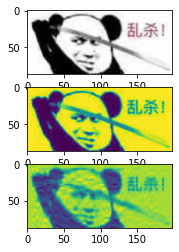

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.587, 0.114])

img =Image.open("images\\YCDP)ES]R~WPYD2)7X}MB9T.jpg")
mat = np.array(img)
print(mat.shape)
plt.subplot(311)
plt.imshow(mat)
plt.subplot(312)
mat_new = rgb2gray(mat)
print(mat_new.shape)
plt.imshow(mat_new)

plt.subplot(313)
pca = PCA(n_components=0.90)
mat_pro = pca.fit_transform(mat_new)
print(mat_pro.shape)
mat_rec = pca.inverse_transform(mat_pro)
print(mat_rec.shape)
plt.imshow(mat_rec)
plt.show()
